##NLP Using Tensorflow

###Data Collection

In [25]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils.data_utils import pad_sequences 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
sentences_init = pd.read_csv("Language Detection.csv")

In [27]:
sentences_init

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [28]:
sentences_init['Text'][4]

'[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or "essential qualities, innate disposition", and in ancient times, literally meant "birth".'

###Preprocessing

In [29]:
sentences = sentences_init.sample(frac=1)

In [30]:
sentences

,Text,Language
4147,aller de l'avant.,French
2775,[149] A Wikipédia atualmente roda em clusters ...,Portugeese
9412,أحب أن أفعل شيئًا لكني لا أستطيع.,Arabic
5818,Γεια σου ηρεμήσεις μαζί μια άλλη φράση.,Greek
929,Gordon Plotkin and Ehud Shapiro laid the initi...,English
...,...,...
5080,Hay controversia sobre su fiabilidad y precisión.,Spanish
3190,espere um segundo.,Portugeese
6923,"dette er en no-brainer betyder, at det er en r...",Danish
9369,ابق على تواصل.,Arabic


In [31]:
sentences_train = sentences[0:6000]
sentences_val = sentences[6000:8000]
sentences_test = sentences[8000:10337]

In [32]:
labels_total = list(sentences['Language'])
sentences_total = list(sentences['Text'])

In [33]:
sentences_test

,Text,Language
1917,ഞാൻ നിങ്ങളോടൊപ്പം ഉണ്ടാകും.,Malayalam
649,[286] Access to Wikipedia from mobile phones w...,English
3212,naquele momento o narciso começou a rir em seu...,Portugeese
8967,شهرة ويكيبيديا تنمو بثبات منذ بداية عملها.,Arabic
106,Other lakes are found in endorheic basins or a...,English
...,...,...
5080,Hay controversia sobre su fiabilidad y precisión.,Spanish
3190,espere um segundo.,Portugeese
6923,"dette er en no-brainer betyder, at det er en r...",Danish
9369,ابق على تواصل.,Arabic


In [34]:
sentences_train_list = list(sentences_train['Text'])
sentences_val_list = list(sentences_val['Text'])
sentences_test_list = list(sentences_test['Text'])

###Tokenization and Feature Engineering

In [ ]:
sentences_train_list

In [35]:
tokenizer = Tokenizer( oov_token="<!CIS490ML!>")

tokenizer.fit_on_texts(sentences_total)
word_index = tokenizer.word_index


In [36]:
sent_len=20
tkSentences_train = tokenizer.texts_to_sequences(sentences_train_list)
pd_train = pad_sequences(tkSentences_train, padding = 'post', maxlen=sent_len)

tkSentences_val = tokenizer.texts_to_sequences(sentences_val_list)
pd_val = pad_sequences(tkSentences_val, padding = 'post', maxlen=sent_len)

tkSentences_test = tokenizer.texts_to_sequences(sentences_test_list)
pd_test = pad_sequences(tkSentences_test, padding = 'post', maxlen=sent_len)

In [37]:
#print(word_index)
#print(tkSentences_train)
print(pd_train[0])

[ 4937     2 18321     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [38]:
pd_train[0].shape

(20,)

###Alternative Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(dataset).toarray()

###Label Encoding

In [39]:
lang = sentences['Language'].unique()
lang

array(['French', 'Portugeese', 'Arabic', 'Greek', 'English', 'Kannada',
       'Spanish', 'German', 'Tamil', 'Dutch', 'Malayalam', 'Turkish',
       'Russian', 'Italian', 'Sweedish', 'Danish', 'Hindi'], dtype=object)

In [40]:
label = LabelEncoder()
label.fit(lang)

def encode(y):
    """
    Returns a list of one hot encodings
    Params
    ---------
        y: list of language labels
    """
    
    y_encoded = label.transform(y)
    y_dummy = np_utils.to_categorical(y_encoded)
    
    return y_dummy

In [41]:
train_y = encode(sentences_train['Language'])
val_y = encode(sentences_val['Language'])
test_y = encode(sentences_test['Language'])
y_cat = encode(sentences['Language'])

In [42]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
train_y.shape

(6000, 17)

In [44]:
pd_train[0]

array([ 4937,     2, 18321,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

###Model Selection and Building

Regular Sequential Network

Requires vector representation of sentences as input



In [45]:
model_cat = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dense(17, activation = 'softmax')
])
model_cat.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Sequential network with an Embedding input layer 

Accepts list of tokenised sentences directly

In [47]:
model_em = tf.keras.Sequential([
    tf.keras.layers.Embedding(50000, 20, input_length=sent_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(17, activation = 'softmax')
])
model_em.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

###Model Training

In [48]:
num_epochs = 30
history = model_em.fit(pd_train, train_y, epochs=num_epochs, validation_data=(pd_val, val_y), verbose=2)

Epoch 1/30
188/188 - 4s - loss: 2.6934 - accuracy: 0.2293 - val_loss: 2.3858 - val_accuracy: 0.3705 - 4s/epoch - 22ms/step
Epoch 2/30
188/188 - 3s - loss: 1.9306 - accuracy: 0.4968 - val_loss: 1.5781 - val_accuracy: 0.6310 - 3s/epoch - 16ms/step
Epoch 3/30
188/188 - 4s - loss: 1.1975 - accuracy: 0.7575 - val_loss: 1.0107 - val_accuracy: 0.8290 - 4s/epoch - 20ms/step
Epoch 4/30
188/188 - 4s - loss: 0.7229 - accuracy: 0.9070 - val_loss: 0.6912 - val_accuracy: 0.9230 - 4s/epoch - 21ms/step
Epoch 5/30
188/188 - 3s - loss: 0.4733 - accuracy: 0.9482 - val_loss: 0.5224 - val_accuracy: 0.9345 - 3s/epoch - 16ms/step
Epoch 6/30
188/188 - 3s - loss: 0.3366 - accuracy: 0.9650 - val_loss: 0.4220 - val_accuracy: 0.9405 - 3s/epoch - 17ms/step
Epoch 7/30
188/188 - 3s - loss: 0.2558 - accuracy: 0.9743 - val_loss: 0.3565 - val_accuracy: 0.9500 - 3s/epoch - 17ms/step
Epoch 8/30
188/188 - 4s - loss: 0.2006 - accuracy: 0.9840 - val_loss: 0.3125 - val_accuracy: 0.9560 - 4s/epoch - 23ms/step
Epoch 9/30
188/1

###Model Evaluation

In [49]:
scores = model_em.predict(pd_test)


74/74 [==============================] - 1s 2ms/step


In [50]:
scores_argm = scores.argmax(axis=1)
test_y_argm = test_y.argmax(axis=1)

In [ ]:
pd_test

In [51]:
print(scores[1].round())

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
test_y[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [53]:
acc = tf.keras.metrics.Accuracy()
acc.update_state(test_y_argm, scores_argm)
acc_final = acc.result().numpy()
print('Final result: ', acc_final)

Final result:  0.97004706


In [55]:
lang = np.sort(lang)

In [56]:
print(lang)

['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


In [54]:
cr = classification_report(test_y_argm, scores_argm)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       116
           1       0.98      0.95      0.96        96
           2       0.97      0.98      0.97       118
           3       0.99      0.97      0.98       326
           4       0.98      0.99      0.99       206
           5       0.98      0.99      0.99       105
           6       1.00      0.97      0.99        80
           7       1.00      1.00      1.00        10
           8       0.99      0.96      0.98       168
           9       1.00      0.96      0.98        79
          10       1.00      0.96      0.98       140
          11       0.99      0.97      0.98       167
          12       0.99      0.97      0.98       164
          13       0.94      0.98      0.96       175
          14       0.98      0.95      0.97       175
          15       1.00      0.96      0.98       104
          16       0.74      0.99      0.85       108

    accuracy              

In [57]:
conf_matrix = tf.math.confusion_matrix(test_y_argm, scores_argm)

In [58]:
cm = confusion_matrix(test_y_argm, scores_argm)

In [59]:
conf_matrix_df = pd.DataFrame(cm,columns=lang,index=lang)

In [ ]:
conf_matrix_df

###Visualizations

Text(91.25, 0.5, 'Actual')

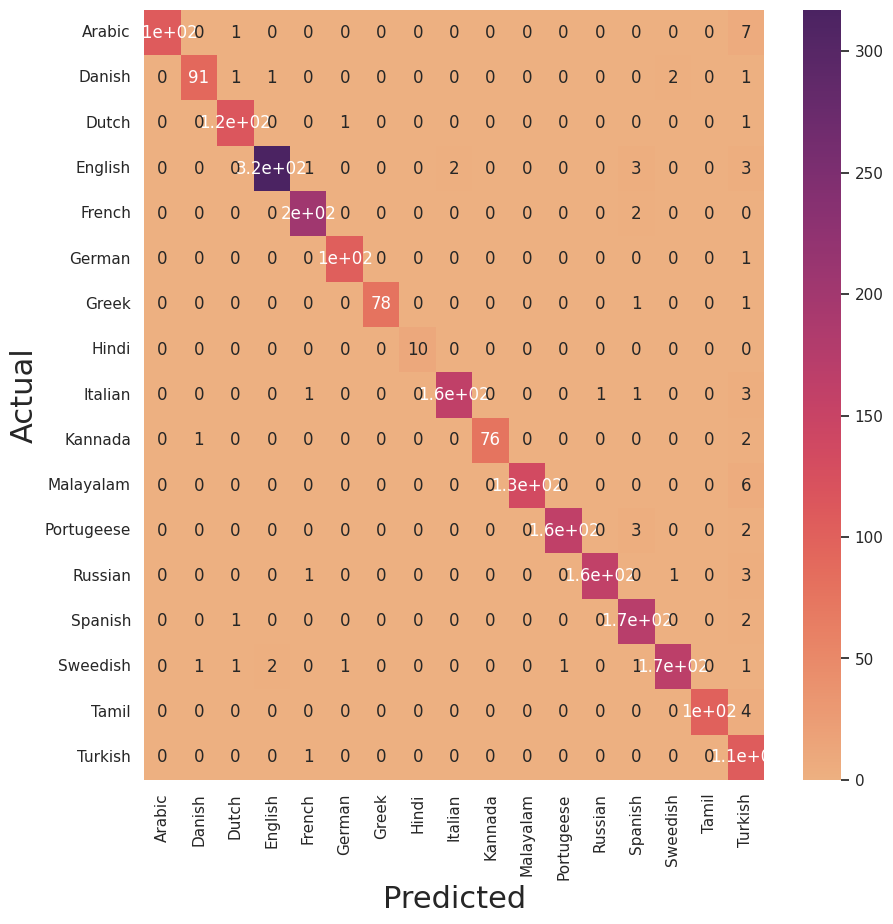

In [91]:
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1)
sns.heatmap(conf_matrix_df,cmap='flare',annot=True)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

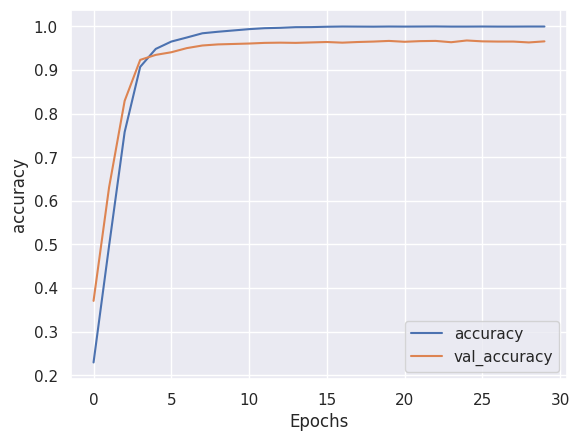

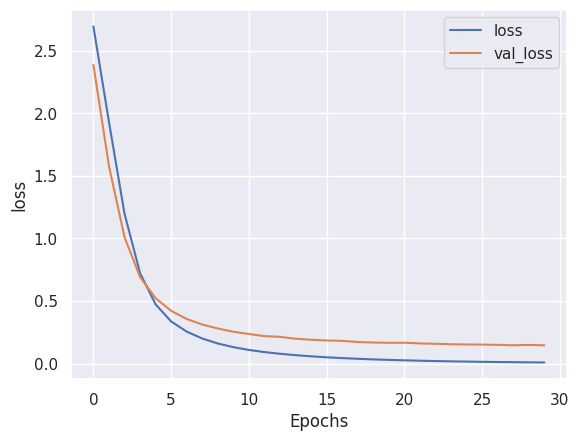

In [90]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

###Inference with new Data

In [74]:
test_set = [
    'This test A, how is the weather?', 
    'Det här provet A, hur är vädret?',
    'இந்த டெஸ்ட் ஏ, வானிலை எப்படி உள்ளது?', 
    'هذا الاختبار A، كيف الطقس؟', 
    'E wa wo oke yi']

In [ ]:
tkSentences_testset = tokenizer.texts_to_sequences(test_set)
pd_testset = pad_sequences(tkSentences_testset, padding = 'post', maxlen=sent_len)

In [ ]:
scores = model_em.predict(pd_test)

In [ ]:
print(scores[1].round())

In [88]:
print(lang)

['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


###Another Example

In [75]:
sentences_yb = [
    'E jowo, e ma binu', 
    'Mo fe ra ile', 
    'Ori mi wu', 
    'Omo mi nko?', 
    'Adupe', 
    'Omo Yoruba ni mi', 
    'E jowo, e gba mi lara', 
    'Olorun a ma ni be ni o', 
    'Eyi ni ojumo ti mo fi se ise mi', 
    'E ku ise o', 
    'Inu mi dun lati ri omo re', 
    'Eleyi o le da mi lori', 
    'A n lo sile', 
    'O wa ni ile-eko yii', 
    'Oju mi ri irin ajo ni', 
    'E lo ra ewe ati egbo', 
    'A n lo sinu ile-eko', 
    'A n pe ara wa ni eko re', 
    'E maa binu, emi o fi le o', 
    'O wa daadaa ni', 
    'Mo n gbadura fun o', 
    'Nibo ni o wa?', 
    'Emi ni to n ba so fun e pe omo mi nko?', 
    'O wa loyun funfun', 
    'Oun ti o ba wa', 
    'E ma binu fun mi', 
    'Mo n wo bi o se n lo', 
    'Mo n ro pe o gba mi lara', 
    'Oro yii o le shey', 
    'Emi gan ni mo ti n feso riro', 
    'A n wa oko', 
    'E fi ile-eko yi wo o', 
    'O ti gbe aya mi sile', 
    'A n so fun o pe omo mi nko?', 
    'E je ki a gbe ese mi lo', 
    'E ma binu o', 
    'Mo fe ra irin ajo', 
    'O wa pelu wa', 
    'Oun ti o nso pe o ti de ile-eko', 
    'Mo n ri ise re nko?', 
    'E so fun o pe omo mi nko?', 
    'E wo awon eniyan yii', 
    'Mo n wa ayo', 
    'Eleyi o joko sori oke', 
    'O wa ni ara e', 
    'O seun rere', 
    'O wa ni oko re', 
    'O ti de ibi ti mo ti n lo', 
    'A n pe ara wa ni iwe re', 
    'A n lo si ile', 
    'Mo n ro pe o ma se o', 
    'O ni owo loju', 
    'E je ki a ri ise mi', 
    'E ma binu fun mi', 
    'Mo ti n ri pe o wa ni ise wa', 
    'Mo n gbo bi o se n lo', 
    'O wa ni aya e',  
    'O wa ni aya re', 
    'A n so fun o pe omo mi nko?']
   


In [ ]:
sentences_ch = [
    '今天的天气非常好。',
    '我喜欢吃中国菜。',
    '你喜欢什么颜色？',
    '这个问题很难回答。',
    '他的汉语说得很流利。',
    '这本书非常有趣。',
    '我很喜欢运动。',
    '我们需要更多的信息。',
    '他是我的好朋友。',
    '我想要一杯咖啡。',
    '你知道吗？我会弹钢琴。',
    '我很喜欢旅游。',
    '这是一个非常重要的问题。',
    '你喜欢喝茶还是咖啡？',
    '这个城市很繁忙。',
    '我需要更多的练习。',
    '我的家人都很善良。',
    '这是一家很不错的餐厅。',
    '你想要做什么？',
    '我很喜欢中国的文化。',
    '这个地方非常漂亮。',
    '我们应该多关心环境。',
    '我喜欢读书。',
    '你觉得这个问题有意思吗？',
    '我的生日是十二月二十日。',
    '这个小孩非常可爱。',
    '我想学习更多的语言。',
    '这个计划需要一些改进。',
    '你的汉语说得很好。',
    '我爱我的家乡。',
    '这个电影非常感人。',
    '这是一个很好的机会。',
    '我们应该保护动物。',
    '这个城市很美丽。',
    '我会弹吉他。',
    '你觉得这个问题应该怎样解决？',
    '我很喜欢看电影。',
    '你喜欢吃什么？',
    '这个学校很好。',
    '我非常感激你的帮助。',
    '这个地方非常有趣。',
    '我们应该尊重每个人。',
    '我的梦想是成为一名医生。',
    '这个城市有很多历史。',
    '你会开车吗？',
    '这个人非常友好。',
    '我想要学习更多的关于中国的知识。',
    '这个问题需要更多的时间来解决。',
    '你有什么建议吗？',
    '这个计划很成功。',
    '我喜欢吃水果。',
    '你觉得这个电影好看吗？',
    '这个地方很安静。',
    '我们应该珍惜自然资源。',
    '我的英语不太']

In [ ]:
sentences_ch_df = pd.DataFrame(sentences_ch, columns=['Text'])
sentences_ch_df['Language'] = 'Chinese'
sentences_ch_df

In [ ]:
sentences_init = sentences_init.append(sentences_ch_df)

<ipython-input-75-589a302e8410>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentences_init = sentences_init.append(sentences_ch_df)


###Stuff

In [93]:
temp = 0
count = 100000000000
culprit = 'boo'
for sen in sentences_test['Language']:
  temp = sentences_test['Language'].value_counts()[sen]
  if temp < count:
    count = temp
    culprit = sen

print(count)
print(culprit)

10
Hindi


In [70]:
model_em.save('saved_models/NLPtf')

In [76]:
sentences_yb[11]

'Eleyi o le da mi lori'

In [ ]:
sentences_init['Language']